# CLASS ASSIGNMENT
**Name:** Matta Akhil  
**Student ID:** 23389605  
**Date:** 18/03/2025  
**Course:** Masters in Data Analytics(MSCDAD_B_JAN25I)     
**Subject:** Satistics And Optimization 

In [799]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#### Importing Data.

In [800]:
df = pd.read_csv("./hospitaldata.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,_Other,Referral,1,Other,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,...,No,No,Up,No,No,No,No,Yes,Yes,After30Days
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,...,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,...,No,No,Up,No,No,No,No,Yes,Yes,No
4,16680,42519267,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,...,No,No,Steady,No,No,No,No,Yes,Yes,No


#### Basic Info of the dataset

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   weight                    101763 non-null  object
 6   discharge_disposition_id  101763 non-null  object
 7   admission_source_id       101763 non-null  object
 8   time_in_hospital          101763 non-null  int64 
 9   medical_specialty         101763 non-null  object
 10  num_lab_procedures        101763 non-null  int64 
 11  num_procedures            101763 non-null  int64 
 12  num_medications           101763 non-null  int64 
 13  number_outpatient         101763 non-null  int64 
 14  numb

data set have 101763 rows and 47 columns in total

In [802]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017630e+05,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,1.652008e+08,5.432965e+07,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649
std,1.026410e+08,3.869658e+07,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495975e+07,2.341296e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523883e+08,4.550049e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302698e+08,8.754571e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### Readmission Data Count

In [803]:
print('>30 readmission', df['readmitted'][df['readmitted'] == 'After30Days'].count())
print('<30 readmission', df['readmitted'][df['readmitted'] == 'Within30Days'].count())
print('No readmission', df['readmitted'][df['readmitted'] == 'No'].count())

>30 readmission 35545
<30 readmission 11357
No readmission 54861


#### Data Cleaning

##### Checking any missing values in the Dataset

In [804]:
# Calculate missing values

missingvalues = pd.DataFrame(df.isnull().sum(axis=0), columns=['number_of_missing_values'])
missingvalues['feature'] = missingvalues.index
missingvalues = missingvalues[['feature','number_of_missing_values']].reset_index(drop=True)
missingvalues[missingvalues.number_of_missing_values > 0]

,feature,number_of_missing_values


##### Checking any ? (unknown/Invalid) values in the dataset of object datatype

In [805]:
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[col][df[col] == "?"].count())
print('gender',df['gender'][df['gender']=='Unknown/Invalid'].count())

race 0
gender 0
age 0
weight 0
discharge_disposition_id 0
admission_source_id 0
medical_specialty 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


##### Checking rows from the dataframe where the columns diag_1, diag_2, and diag_3 which are having the value "?"

In [806]:
drop_Idx = set(df[(df['diag_1'] == "?")&(df['diag_2'] == "?")&(df['diag_3'] == "?")].index)
new_Idx = list(set(df.index)-set(drop_Idx))
df = df.iloc[new_Idx]

##### Dropping some rows/columns from dataframe

In [807]:
# dropping weight feature because it has too many (96k+) unknown values.
# This will not help much w.r.t our model so removing entire feature 
df = df.drop(['weight'], axis=1)

In [808]:
# Remove the columns citoglipton, examide,acetohexamide which are not serving enough info for the model
df = df.drop(['citoglipton', 'examide', 'acetohexamide'], axis=1)

In [809]:
df.shape

(101762, 43)

#### Data Visulaizations

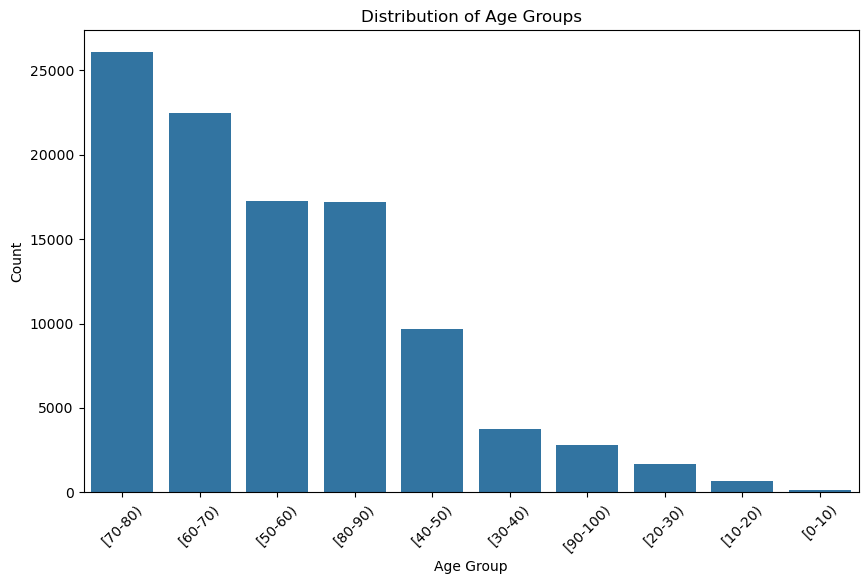

In [810]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, order=df['age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

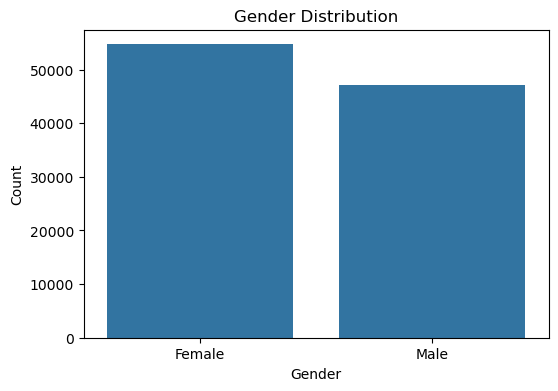

In [811]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

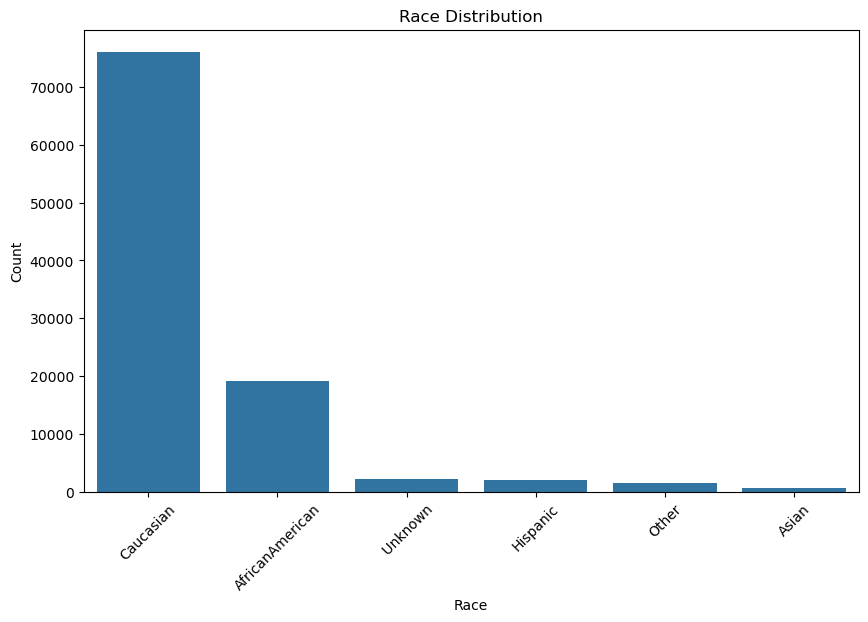

In [812]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

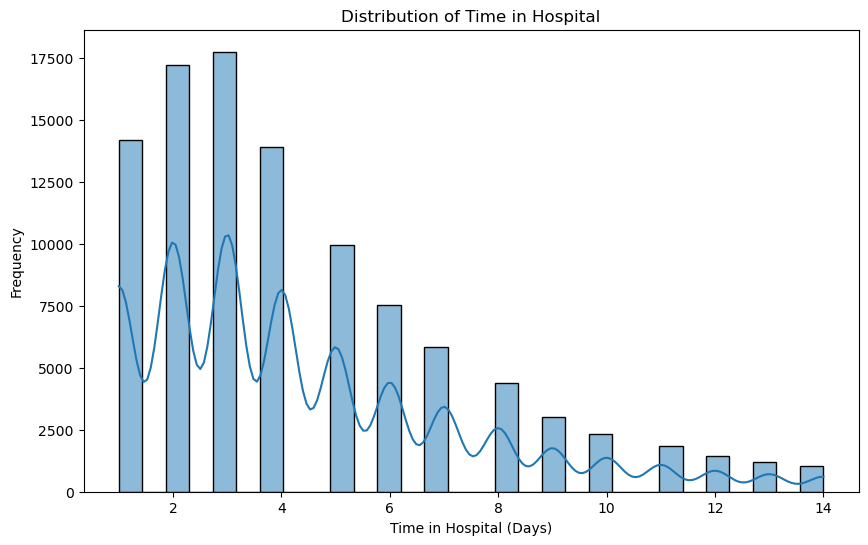

In [813]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], bins=30, kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Frequency')
plt.show()

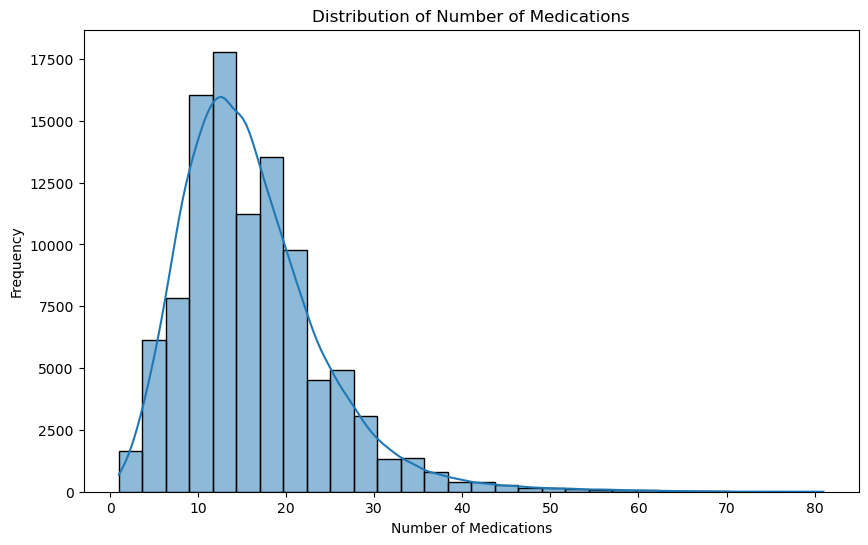

In [814]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_medications'], bins=30, kde=True)
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.show()

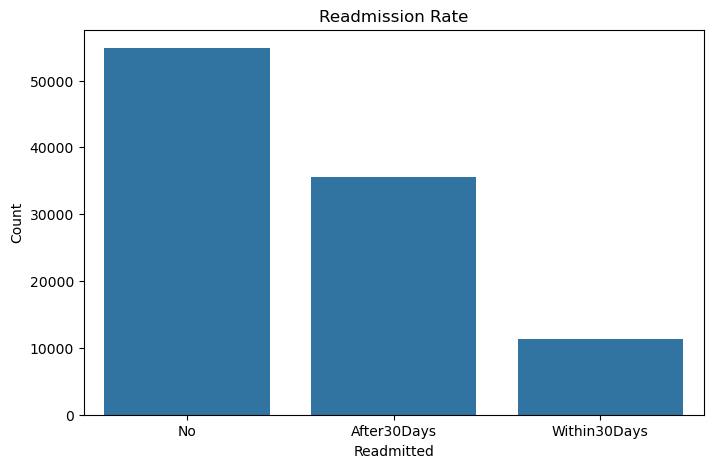

In [815]:
plt.figure(figsize=(8, 5))
sns.countplot(x='readmitted', data=df, order=df['readmitted'].value_counts().index)
plt.title('Readmission Rate')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

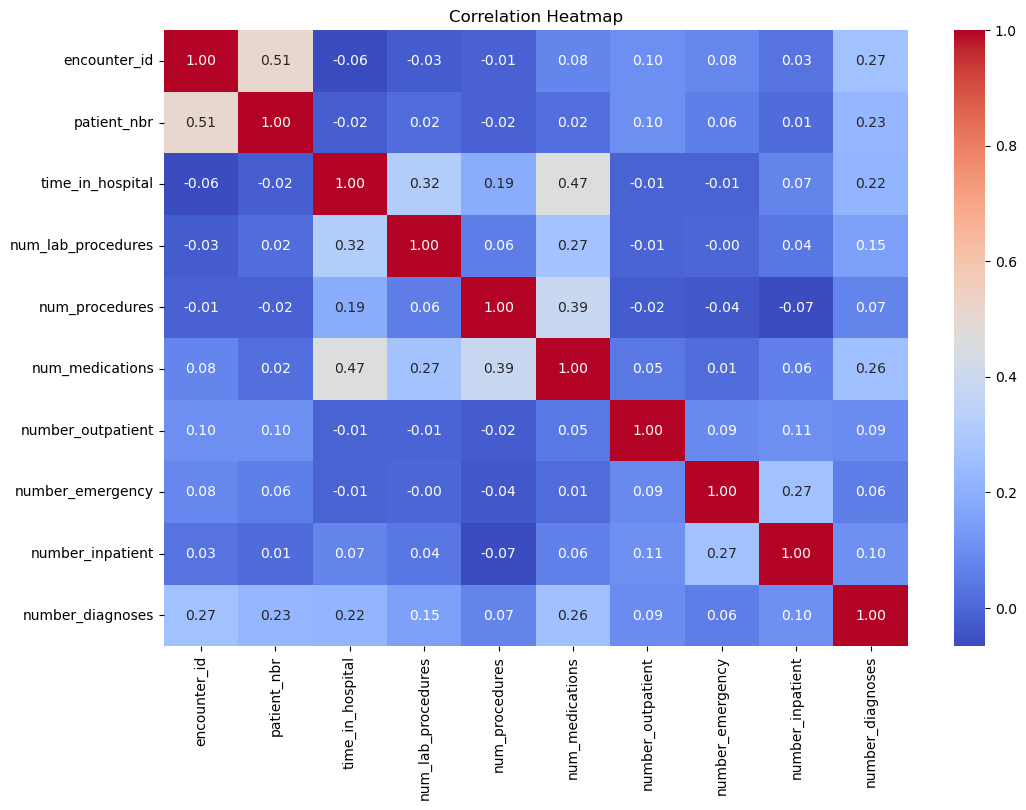

In [816]:
# Select numerical columns for correlation
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

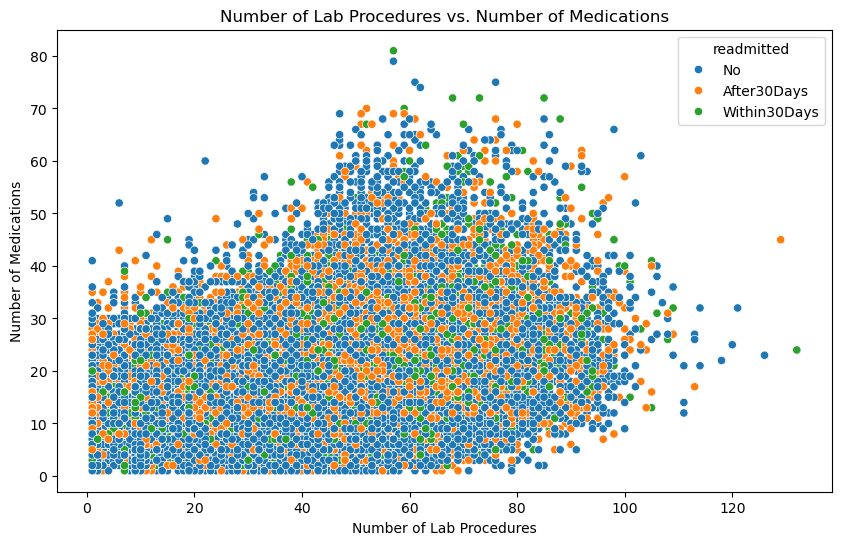

In [817]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_lab_procedures', y='num_medications', data=df, hue='readmitted')
plt.title('Number of Lab Procedures vs. Number of Medications')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.show()

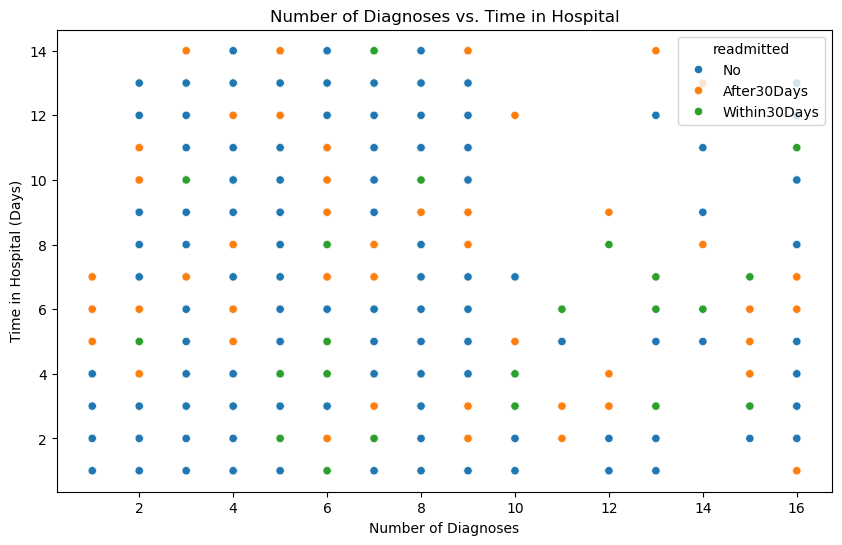

In [818]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_diagnoses', y='time_in_hospital', data=df, hue='readmitted')
plt.title('Number of Diagnoses vs. Time in Hospital')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Time in Hospital (Days)')
plt.show()

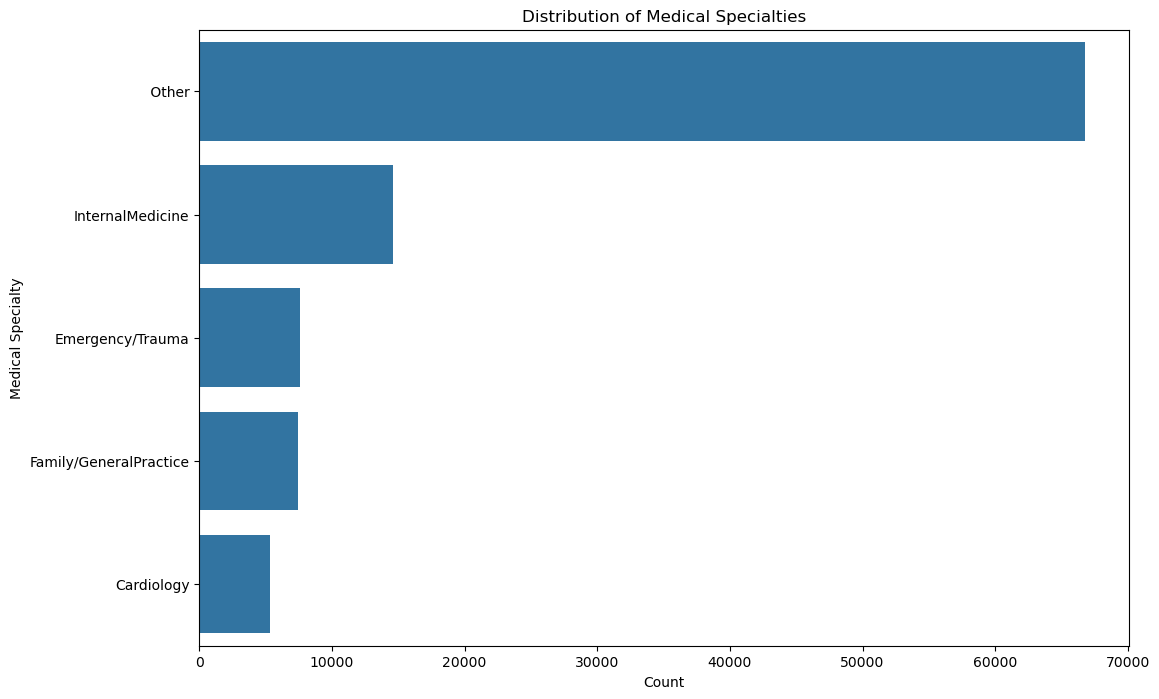

In [819]:
plt.figure(figsize=(12, 8))
sns.countplot(y='medical_specialty', data=df, order=df['medical_specialty'].value_counts().index)
plt.title('Distribution of Medical Specialties')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.show()

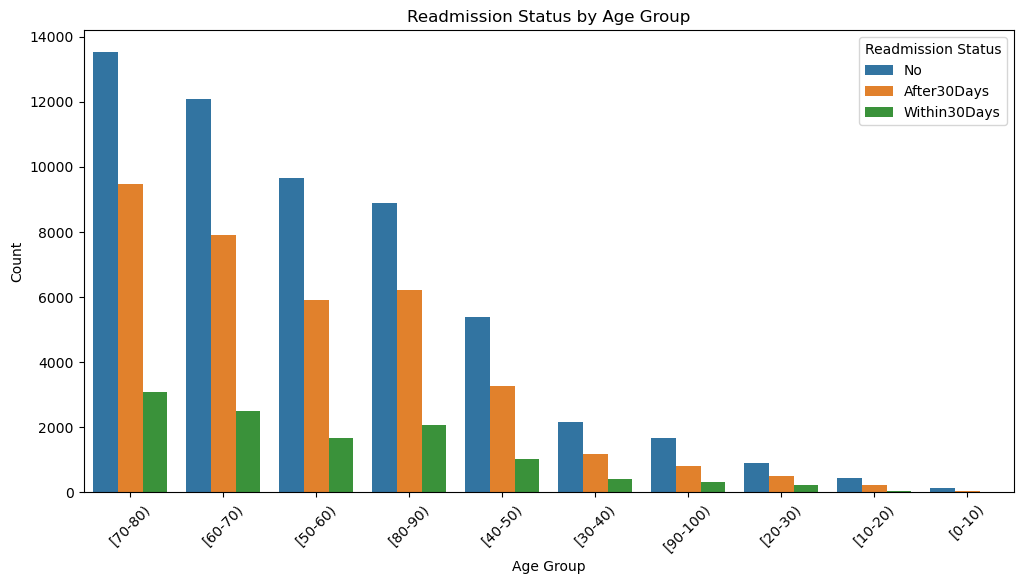

In [820]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='readmitted', data=df, order=df['age'].value_counts().index)
plt.title('Readmission Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status')
plt.show()

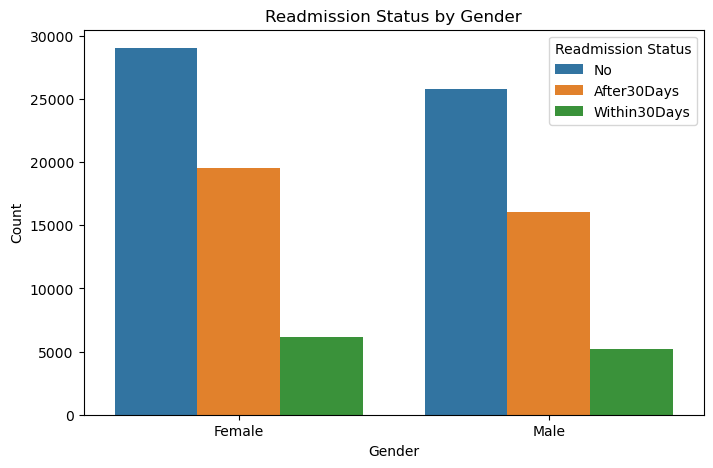

In [821]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Readmission Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmission Status')
plt.show()

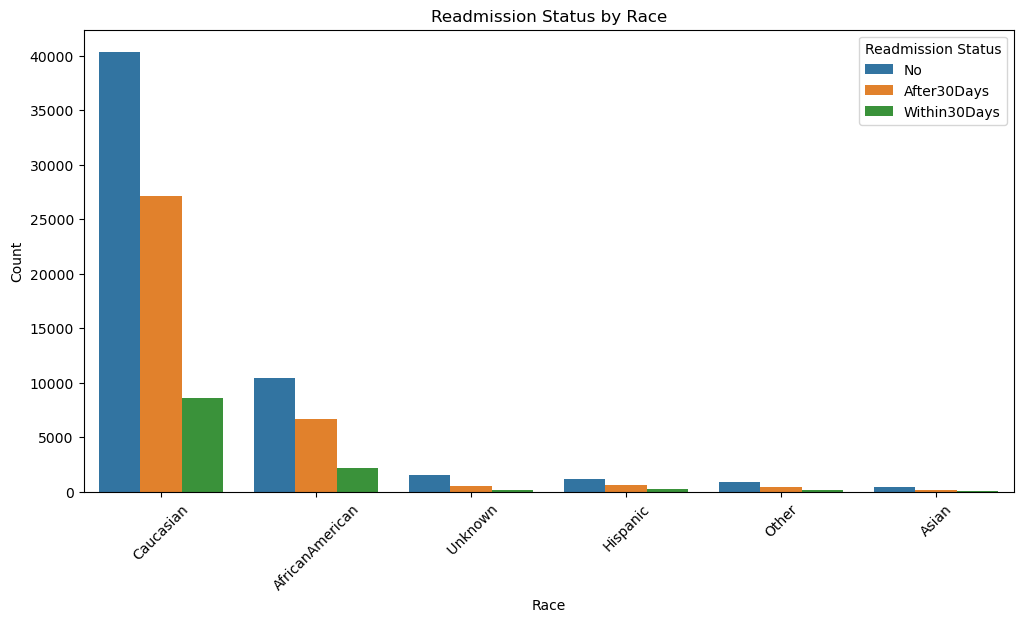

In [822]:
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='readmitted', data=df, order=df['race'].value_counts().index)
plt.title('Readmission Status by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status')
plt.show()

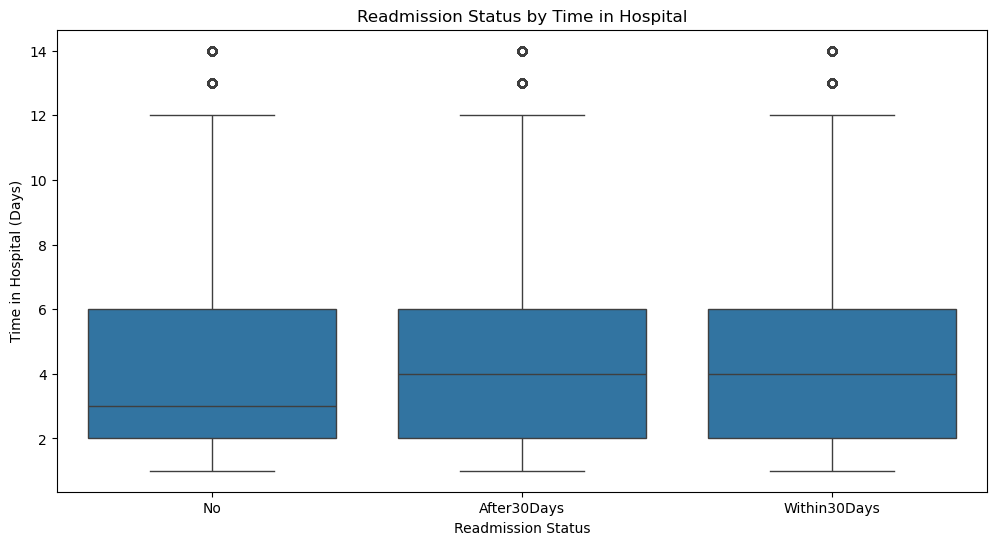

In [823]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Readmission Status by Time in Hospital')
plt.xlabel('Readmission Status')
plt.ylabel('Time in Hospital (Days)')
plt.show()

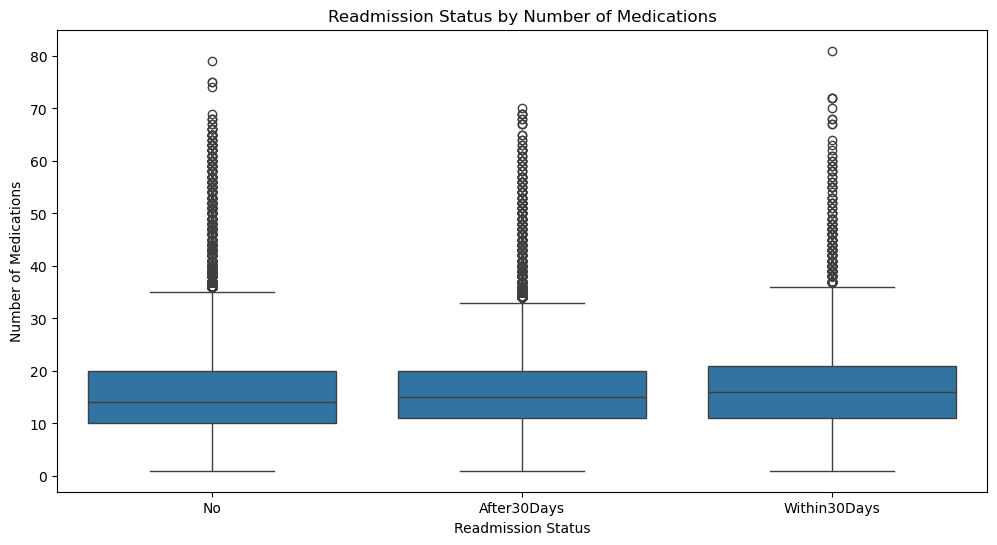

In [824]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='num_medications', data=df)
plt.title('Readmission Status by Number of Medications')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Medications')
plt.show()

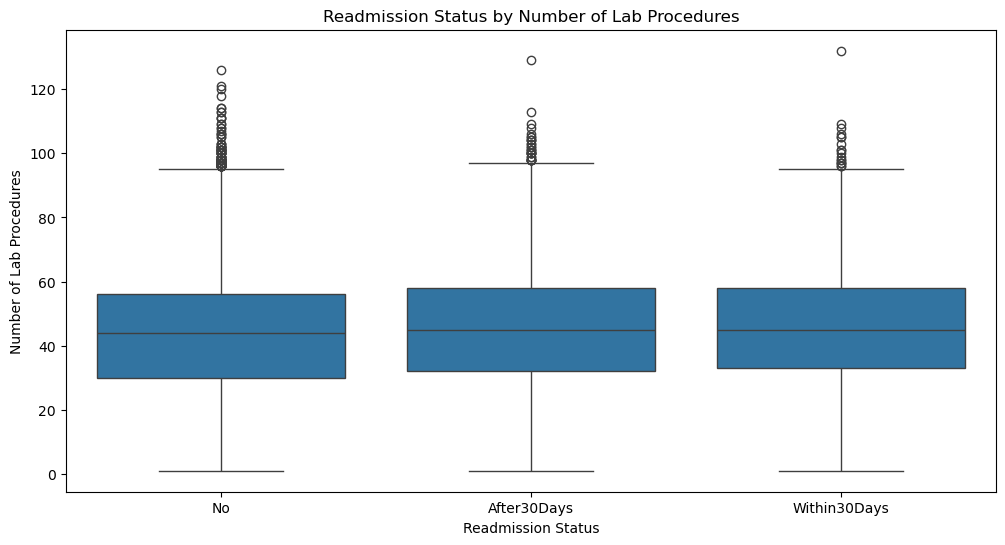

In [825]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df)
plt.title('Readmission Status by Number of Lab Procedures')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Lab Procedures')
plt.show()

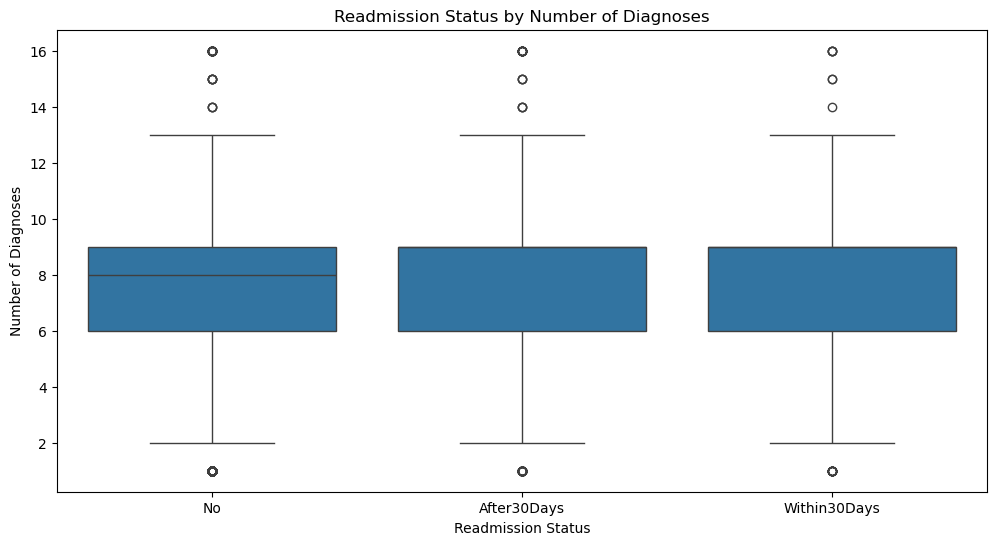

In [826]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='number_diagnoses', data=df)
plt.title('Readmission Status by Number of Diagnoses')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Diagnoses')
plt.show()

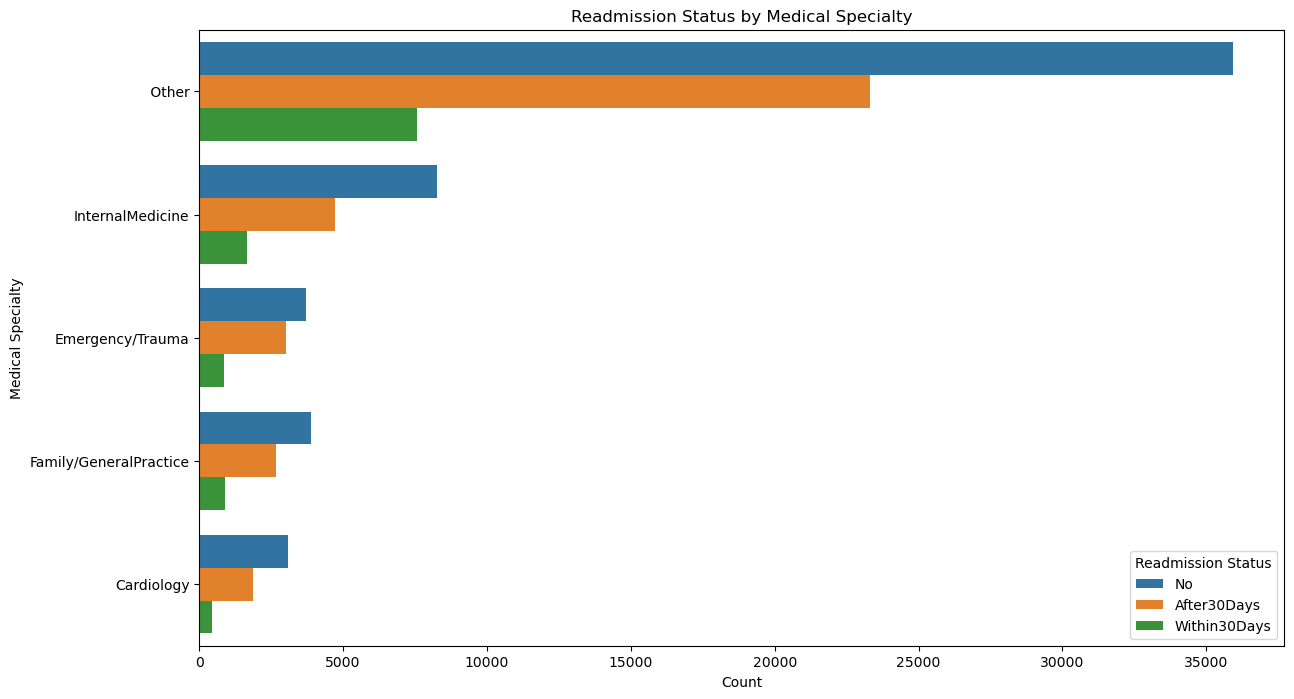

In [827]:
plt.figure(figsize=(14, 8))
sns.countplot(y='medical_specialty', hue='readmitted', data=df, order=df['medical_specialty'].value_counts().index)
plt.title('Readmission Status by Medical Specialty')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.legend(title='Readmission Status')
plt.show()

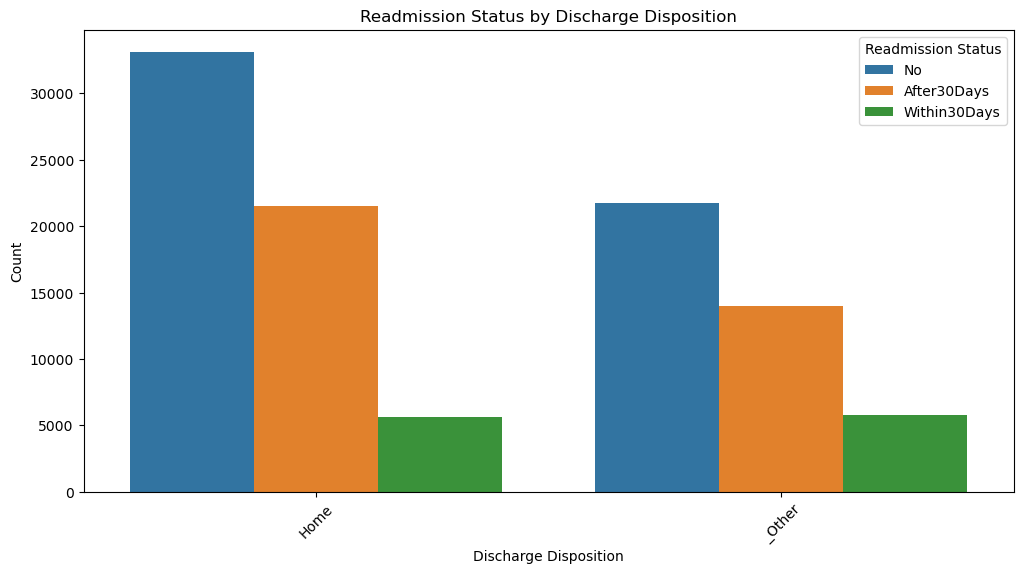

In [828]:
plt.figure(figsize=(12, 6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df, order=df['discharge_disposition_id'].value_counts().index)
plt.title('Readmission Status by Discharge Disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status')
plt.show()

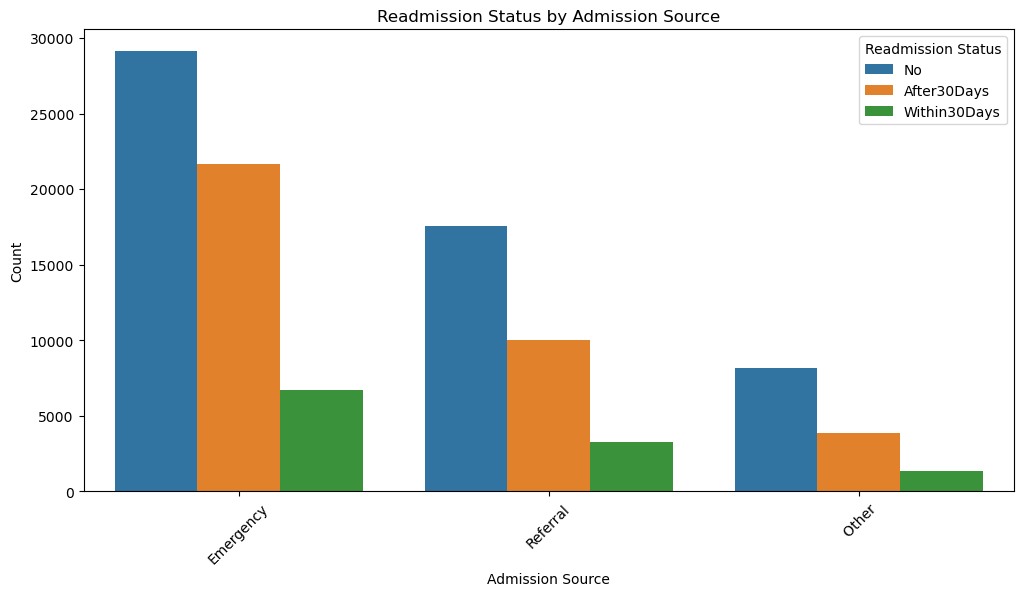

In [829]:
plt.figure(figsize=(12, 6))
sns.countplot(x='admission_source_id', hue='readmitted', data=df, order=df['admission_source_id'].value_counts().index)
plt.title('Readmission Status by Admission Source')
plt.xlabel('Admission Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status')
plt.show()

#### Detecting and removing outliers

In [830]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers_dict = {}

for col in numerical_columns:
    outliers = detect_outliers_iqr(df[col])
    outliers_dict[col] = outliers
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in encounter_id: 0
Outliers in patient_nbr: 247
Outliers in time_in_hospital: 2252
Outliers in num_lab_procedures: 143
Outliers in num_procedures: 4954
Outliers in num_medications: 2557
Outliers in number_outpatient: 16739
Outliers in number_emergency: 11383
Outliers in number_inpatient: 7049
Outliers in number_diagnoses: 281


##### Visulising outliers

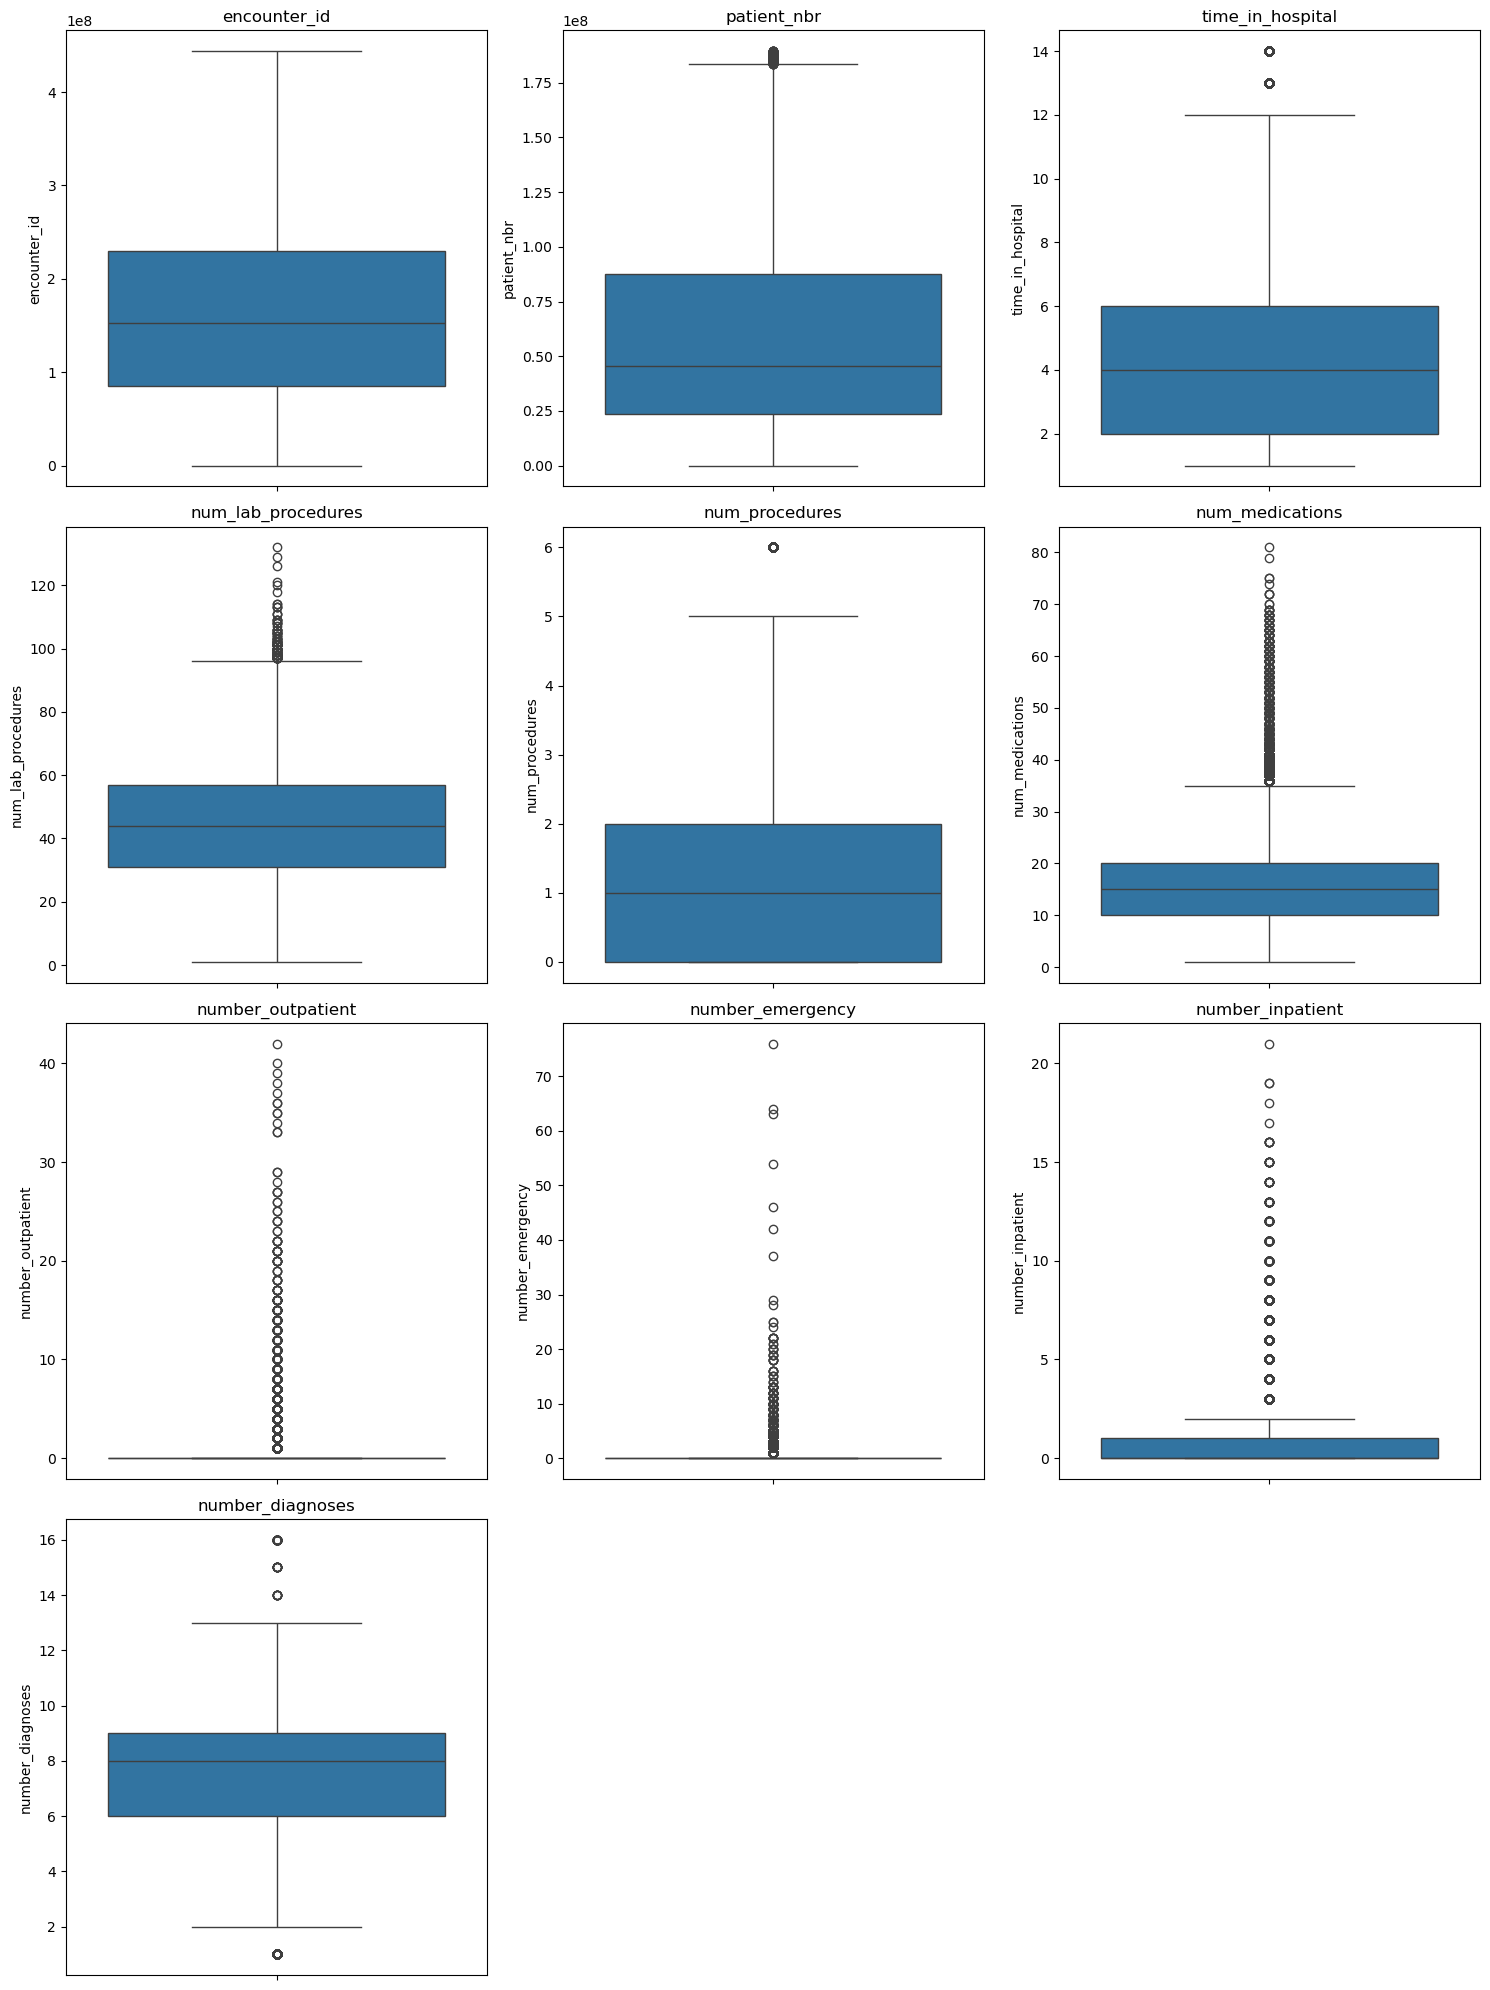

In [831]:
# Calculate the number of numerical columns
num_cols = len(numerical_columns)

# Determine the number of rows and columns for the subplot grid
n_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  # Ensure enough rows
n_cols = 3  # Fixed number of columns

# Create the subplot grid
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically adjust subplot position
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [832]:
for col in numerical_columns:
    median = df[col].median()  # Calculate the median of the column
    lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    
    # Replace outliers with the median
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

In [833]:
outliers_dict_after = {}

for col in numerical_columns:
    outliers = detect_outliers_iqr(df[col])
    outliers_dict_after[col] = outliers
    print(f"Outliers in {col} after handling: {len(outliers)}")

Outliers in encounter_id after handling: 0
Outliers in patient_nbr after handling: 48
Outliers in time_in_hospital after handling: 0
Outliers in num_lab_procedures after handling: 0
Outliers in num_procedures after handling: 0
Outliers in num_medications after handling: 1345
Outliers in number_outpatient after handling: 0
Outliers in number_emergency after handling: 0
Outliers in number_inpatient after handling: 0
Outliers in number_diagnoses after handling: 0


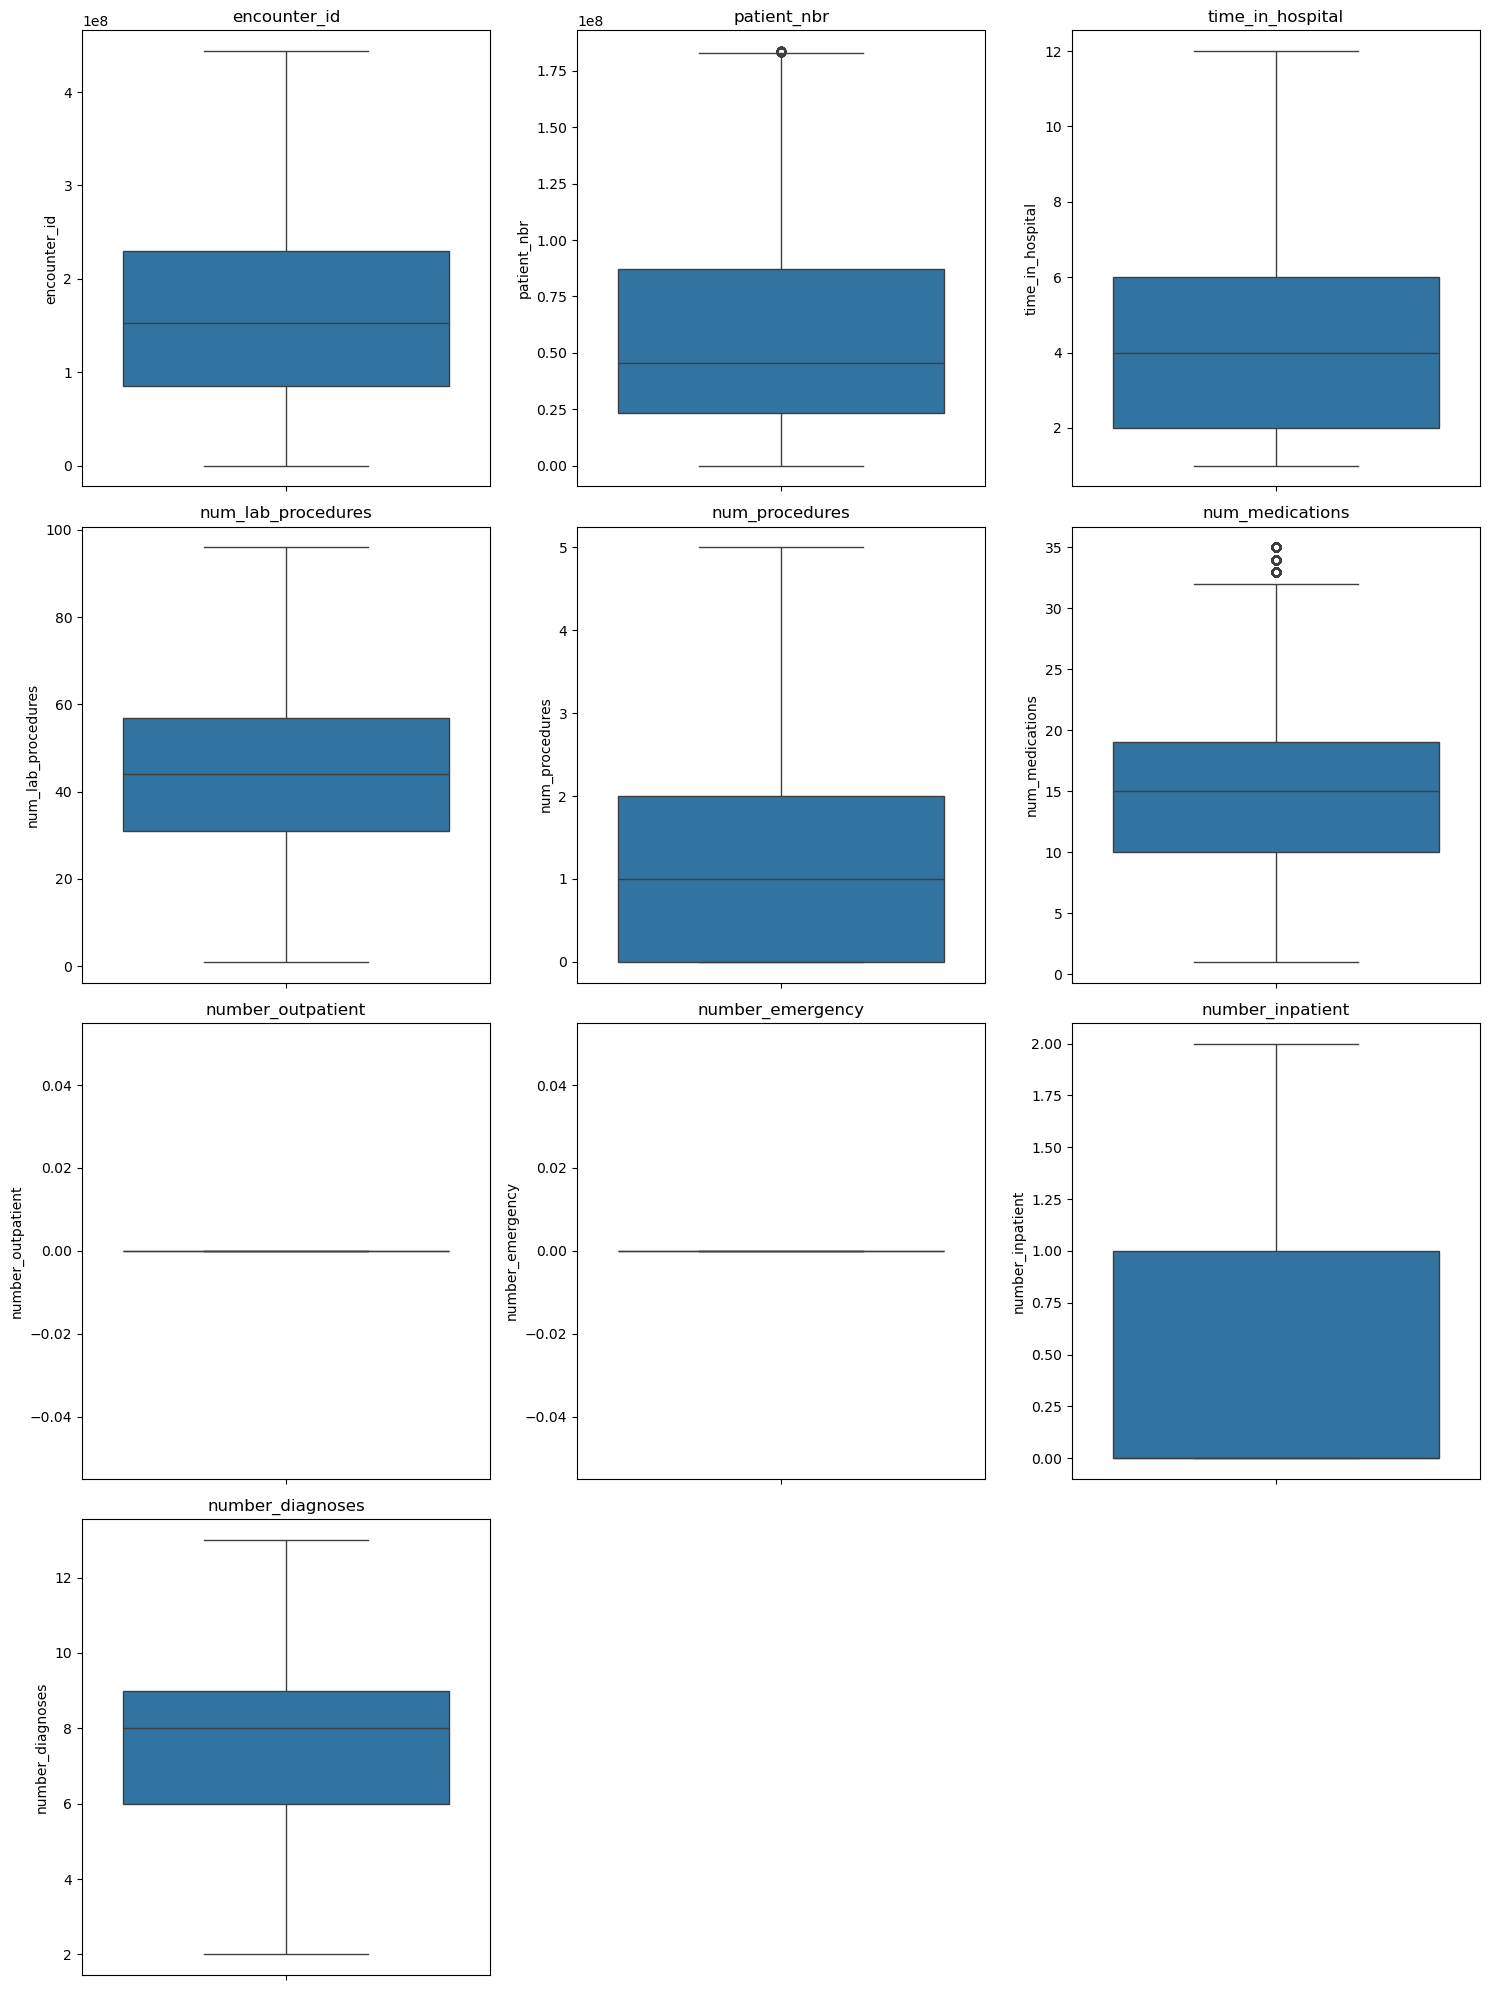

In [834]:
# Calculate the number of numerical columns
num_cols = len(numerical_columns)

# Determine the number of rows and columns for the subplot grid
n_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  # Ensure enough rows
n_cols = 3  # Fixed number of columns

# Create the subplot grid
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically adjust subplot position
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [835]:
# Reapplying IQR technique for fetaures which has outliers still
# Reapply IQR method to columns with remaining outliers
for col in ['patient_nbr', 'num_medications']:
    median = df[col].median()  # Calculate the median of the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

# Verify if outliers are handled
for col in ['patient_nbr', 'num_medications']:
    outliers = detect_outliers_iqr(df[col])
    print(f"Outliers in {col} after re-handling: {len(outliers)}")

Outliers in patient_nbr after re-handling: 11
Outliers in num_medications after re-handling: 0


In [836]:
# Cap outliers at the IQR bounds
for col in ['patient_nbr', 'num_medications']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Verify if outliers are handled
for col in ['patient_nbr', 'num_medications']:
    outliers = detect_outliers_iqr(df[col])
    print(f"Outliers in {col} after capping: {len(outliers)}")

Outliers in patient_nbr after capping: 0
Outliers in num_medications after capping: 0


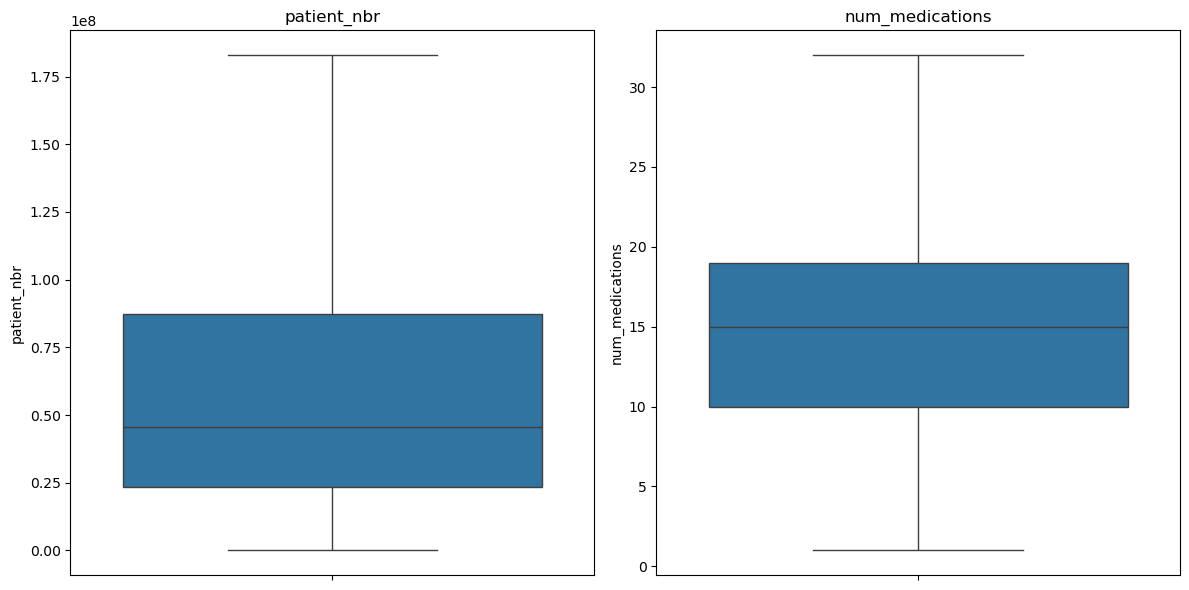

In [837]:
# Visualize the columns after handling outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(['patient_nbr', 'num_medications']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

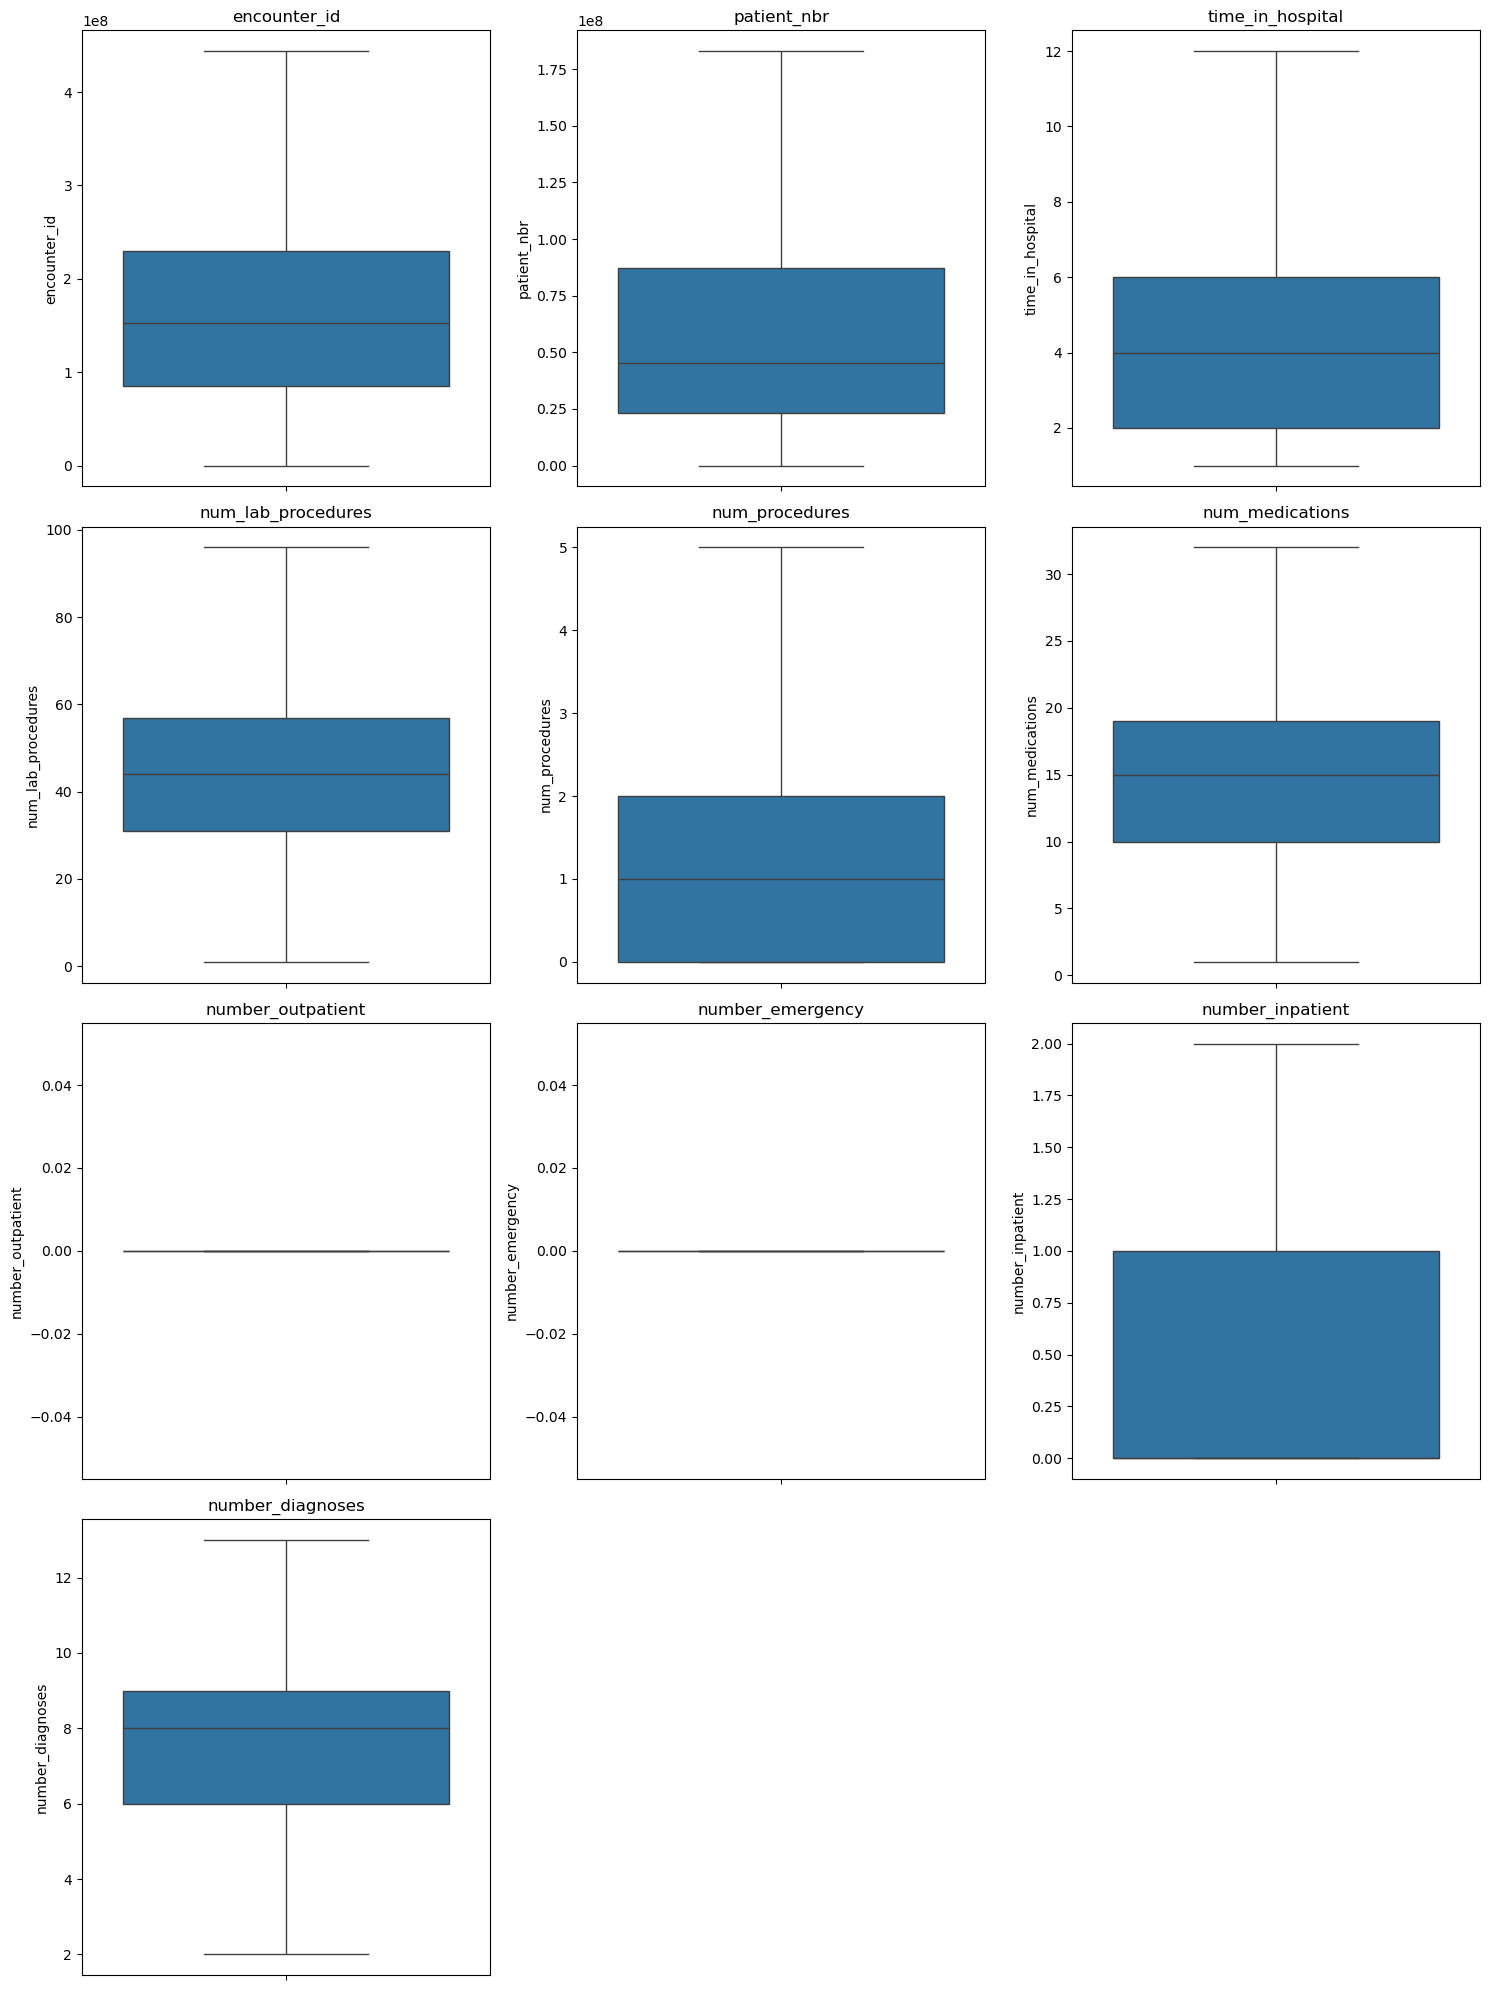

In [838]:
# Calculate the number of numerical columns
num_cols = len(numerical_columns)

# Determine the number of rows and columns for the subplot grid
n_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  # Ensure enough rows
n_cols = 3  # Fixed number of columns

# Create the subplot grid
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically adjust subplot position
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Label encoding the categeorical variables

In [839]:

df['diabetesMed'] = df['diabetesMed'].str.strip().str.lower().replace({'yes': 1, 'no': 0})
df['change'] = df['change'].str.strip().str.lower().replace({'yes': 1, 'no': 0})
df['readmitted'] = df['readmitted'].str.strip().str.lower().replace({'after30days': 0, 'within30days': 1, 'no':0})

for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')',i+1)

label_encoder = LabelEncoder()
columns_to_encode = ['race', 'discharge_disposition_id', 'admission_source_id','medical_specialty','gender']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [840]:
"""The dataset contains 23 features for 23 drugs which indicates in each whether the chnage in that medication was made or not during the current 
hospital stay of the patient .so, medication state on diabetes upon admission has been shown on previous research to be associated
with lower admission rates. so I decided to count how many how many chnages were made for each patient and declare that a new feature

so the reasoning here was to both simplify the model possibly discover a relationship with number of changes regardless of which drug 
was changed 
"""

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone']

# Striping leading/trailing whitespace and convert to lowercase
for col in keys:
    df[col] = df[col].astype(str).str.strip().str.lower()

#Printing unique values in each column to debug
for col in keys:
    print(f"Unique values in {col}: {df[col].unique()}")

# Replacing values in the original columns
replacement_dict = {'no': 0, 'steady': 1, 'up': 1, 'down': 1}
for col in keys:
    df[col] = df[col].replace(replacement_dict)

df['numchange'] = 0
for col in keys:
    df['numchange'] += df[col].apply(lambda x:0 if x == 0 else 1)

Unique values in metformin: ['no' 'steady' 'up' 'down']
Unique values in repaglinide: ['no' 'up' 'steady' 'down']
Unique values in nateglinide: ['no' 'steady' 'down' 'up']
Unique values in chlorpropamide: ['no' 'steady' 'down' 'up']
Unique values in glimepiride: ['no' 'steady' 'down' 'up']
Unique values in glipizide: ['no' 'steady' 'up' 'down']
Unique values in glyburide: ['no' 'steady' 'up' 'down']
Unique values in tolbutamide: ['no' 'steady']
Unique values in pioglitazone: ['no' 'steady' 'up' 'down']
Unique values in rosiglitazone: ['no' 'steady' 'up' 'down']
Unique values in acarbose: ['no' 'steady' 'up' 'down']
Unique values in miglitol: ['no' 'steady' 'down' 'up']
Unique values in troglitazone: ['no' 'steady']
Unique values in tolazamide: ['no' 'steady' 'up']
Unique values in insulin: ['no' 'up' 'steady' 'down']
Unique values in glyburide_metformin: ['no' 'steady' 'down' 'up']
Unique values in glipizide_metformin: ['no' 'steady']
Unique values in glimepiride_pioglitazone: ['no' 's

In [841]:
for col in keys:
    df[col] = df[col].replace('No',0)
    df[col] = df[col].replace('Steady',1)
    df[col] = df[col].replace('Up',1)
    df[col] = df[col].replace('Down',1)

"""
Reduced a1c result and max_glu_serum categeories of normal, abnormal, not tested
>7 & >8 = abnormal
Norm = Normal
None = Not Tested

> 200 & >300 abnormal
Norm normal
None Not tested
"""

# Defining replacement dictionaries
a1c_replacement = {
    '>7': 1,
    '>8': 1,
    'norm': 0,
    'none': -99
}

max_glu_replacement = {
    '>200': 1,
    '>300': 1,
    'norm': 0,
    'none': -99
}

# Striping leading/trailing whitespace and convert to lowercase
df['A1Cresult'] = df['A1Cresult'].astype(str).str.strip().str.lower()
df['max_glu_serum'] = df['max_glu_serum'].astype(str).str.strip().str.lower()

# Replacing values using the dictionaries
df['A1Cresult'] = df['A1Cresult'].replace(a1c_replacement)
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_replacement)

##### Adding intercation effect so that we can see total.

In [842]:
df['service_utilization'] = df ['number_outpatient'] + df['number_emergency'] + df['number_inpatient'] 

In [843]:
# In this part of code I have displayed the total number of mediations used by patient. so, I have created another feature 
# by counting the medications used during the encounter so it contains key list which we have created that contains the list of
# 23 drugs 

df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]

df['nummed'].value_counts()

nummed
1    47316
0    23401
2    21870
3     7777
4     1335
5       58
6        5
Name: count, dtype: int64

##### Mapping disease code(ICD codes) to diagnosis columns

In [844]:
"""
since all these daignosis had 700-900 unique ICD codes it is extremely difficult to include them in model and interpret meaningfully, 
therefore we have collapsed these diagnosis codes into 9 categeries in an almost similar fashion to that done in original publication 
using this dataset

these 9 categeories include circulatoty, respiratory, digestive, diabetics, injury, muscular, skeletal, geniturnary, neoplasm and several others

also we have decided to use only primary diagnosis in our model since we are mapping the disease codes to certain categeory names 

"""

# List of column names for easy iteration
diag_columns = ['diag_1', 'diag_2', 'diag_3']
level1_columns = ['level1_diag1', 'level1_diag2', 'level1_diag3']
level2_columns = ['level2_diag1', 'level2_diag2', 'level2_diag3']

# Create level1 and level2 columns by copying diag columns
for i, diag_col in enumerate(diag_columns):
    df[level1_columns[i]] = df[diag_col]
    df[level2_columns[i]] = df[diag_col]

# Set to 0 if 'V' or 'E' is found in diag columns
for i, diag_col in enumerate(diag_columns):
    df.loc[df[diag_col].str.contains('V|E', na=False), [level1_columns[i], level2_columns[i]]] = 0

# Replace '?' with -1 and convert to float in one go
df[level1_columns + level2_columns] = df[level1_columns + level2_columns].replace('?', -1).astype(float)


In [845]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories

def categorize_level1_diag(level):
    for index, row in df.iterrows():
        if (row[level] >= 390 and row[level] < 460) or (np.floor(row[level]) == 785):
            df.loc[index, level] = 1
        elif (row[level] >= 460 and row[level] < 520) or (np.floor(row[level]) == 786):
            df.loc[index, level] = 2
        elif (row[level] >= 520 and row[level] < 580) or (np.floor(row[level]) == 787):
            df.loc[index, level] = 3
        elif (np.floor(row[level]) == 250):
            df.loc[index, level] = 4
        elif (row[level] >= 800 and row[level] < 1000):
            df.loc[index, level] = 5
        elif (row[level] >= 710 and row[level] < 740):
            df.loc[index, level] = 6
        elif (row[level] >= 580 and row[level] < 630) or (np.floor(row[level]) == 788):
            df.loc[index, level] = 7
        elif (row[level] >= 140 and row[level] < 240):
            df.loc[index, level] = 8
        else:
            df.loc[index, level] = 0

def categorize_level2_diag(level):
    for index, row in df.iterrows():
        if (row[level] >= 390 and row[level] < 399):
            df.loc[index, level] = 1
        elif (row[level] >= 401 and row[level] < 415):
            df.loc[index, level] = 2
        elif (row[level] >= 415 and row[level] < 460):
            df.loc[index, level] = 3
        elif (np.floor(row[level]) == 785):
            df.loc[index, level] = 4
        elif (row[level] >= 460 and row[level] < 489):
            df.loc[index, level] = 5
        elif (row[level] >= 490 and row[level] < 497):
            df.loc[index, level] = 6
        elif (row[level] >= 500 and row[level] < 520):
            df.loc[index, level] = 7
        elif (np.floor(row[level]) == 786):
            df.loc[index, level] = 8
        elif (row[level] >= 520 and row[level] < 530):
            df.loc[index, level] = 9
        elif (row[level] >= 530 and row[level] < 544):
            df.loc[index, level] = 10
        elif (row[level] >= 550 and row[level] < 554):
            df.loc[index, level] = 11
        elif (row[level] >= 555 and row[level] < 580):
            df.loc[index, level] = 12
        elif (np.floor(row[level]) == 787):
            df.loc[index, level] = 13
        elif (np.floor(row[level]) == 250):
            df.loc[index, level] = 14
        elif (row[level] >= 800 and row[level] < 1000):
            df.loc[index, level] = 15
        elif (row[level] >= 710 and row[level] < 740):
            df.loc[index, level] = 16
        elif (row[level] >= 580 and row[level] < 630):
            df.loc[index, level] = 17
        elif (np.floor(row[level]) == 788):
            df.loc[index, level] = 18
        elif (row[level] >= 140 and row[level] < 240):
            df.loc[index, level] = 19
        elif (row[level] >= 240 and row[level] < 280) and (np.floor(row[level]) != 250):
            df.loc[index, level] = 20
        elif (row[level] >= 680 and row[level] < 710) or (np.floor(row[level]) == 782):
            df.loc[index, level] = 21
        elif (row[level] >= 290 and row[level] < 320):
            df.loc[index, level] = 22
        else:
            df.loc[index, level] = 0

categorize_level1_diag('level1_diag1')
categorize_level1_diag('level1_diag2')
categorize_level1_diag('level1_diag3')
categorize_level2_diag('level2_diag1')
categorize_level2_diag('level2_diag2')
categorize_level2_diag('level2_diag3')     

In [846]:
df[['diag_1','level1_diag1']].head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
diag_1,250.83,276,648,8,197,414,414,428,398,434,250.7,157,428,428,518
level1_diag1,4.0,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0,2.0


In [847]:
df.dtypes

encounter_id                float64
patient_nbr                 float64
race                          int64
gender                        int64
age                           int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
medical_specialty             int64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                   

In [848]:
# convert datatype of nominal features in dataframe to 'object' type

i = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone','change', 'diabetesMed','level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
     'level1_diag3', 'level2_diag3']
df[i] = df[i].astype('object')

In [849]:
df.dtypes

encounter_id                 object
patient_nbr                  object
race                         object
gender                       object
age                          object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
medical_specialty             int64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
glipizide                    object
glyburide                   

In [850]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20,20)

dataframe = pd.DataFrame()
dataframe['L1'] = L1
dataframe['L2'] = L2

dataframe.corr()

,L1,L2
L1,1.000000,0.494659
L2,0.494659,1.000000


In [851]:
scalar = MinMaxScaler()
dataframe = pd.DataFrame(scalar.fit_transform(dataframe), columns=['L1','L2'])
dataframe.corr()

,L1,L2
L1,1.000000,0.494659
L2,0.494659,1.000000


In [852]:
# Convert the age to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())

# convert the age values to mid point values
age_dict = {1:5,2:15,3:25,4:35,5:45,6:55,7:65,8:75,9:85,10:95}
df['age'] = df.age.map(age_dict)

age
8     26066
7     22481
6     17256
9     17197
5      9685
4      3775
10     2793
3      1657
2       691
1       161
Name: count, dtype: int64


In [853]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_inpatient',
 'time_in_hospital',
 'number_emergency',
 'numchange',
 'service_utilization',
 'nummed',
 'age',
 'number_outpatient',
 'num_procedures',
 'medical_specialty',
 'num_medications',
 'number_diagnoses',
 'num_lab_procedures']

In [854]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency', 'service_utilization'], axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diabetesMed,readmitted,numchange,nummed,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,2278392.0,8222157.0,3,0,5,1,2,1.0,0,41.0,...,0,0,0,0,4.0,14.0,0.0,0.0,0.0,0.0
1,149190.0,55629189.0,3,0,15,0,1,3.0,0,59.0,...,1,0,1,1,0.0,20.0,4.0,14.0,0.0,20.0
2,64410.0,86047875.0,1,0,25,0,1,2.0,0,11.0,...,1,0,1,1,0.0,0.0,4.0,14.0,0.0,0.0
3,500364.0,82442376.0,3,1,35,0,1,2.0,0,44.0,...,1,0,1,1,0.0,0.0,4.0,14.0,1.0,2.0
4,16680.0,42519267.0,3,1,45,0,1,1.0,0,51.0,...,1,0,2,2,8.0,19.0,8.0,19.0,4.0,14.0


In [855]:
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [856]:
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone']

df[i] = df[i].astype('int64')
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                           int64
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
medical_specialty             int64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                  int64
rosiglitazone               

In [857]:
df.drop(['diag_1','diag_2','diag_3','level2_diag1', 'level1_diag2','level2_diag2','level1_diag3','level2_diag3'],axis=1, inplace=True)

In [858]:
interactionfeatures = [
    ('num_medications', 'time_in_hospital'),
    ('num_medications', 'num_procedures'),
    ('time_in_hospital', 'num_lab_procedures'),
    ('num_medications', 'num_lab_procedures'),
    ('num_medications', 'number_diagnoses'),
    ('age', 'number_diagnoses'),
    ('change', 'num_medications'),
    ('number_diagnoses', 'time_in_hospital'),
    ('num_medications', 'numchange')
]

for inter in interactionfeatures:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [859]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [860]:
df[numerics] = standardize(df[numerics])
df = df[(np.abs(sp.stats.zscore(df[numerics])) < 3).all(axis=1)]

In [861]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
race,1.000000,0.055562,0.117572,0.040248,0.018018,-0.016140,-0.077919,-0.023554,0.006334,0.024611,0.084399,0.064232,-0.012062,0.014729,0.025211,-0.004384,0.008467,0.011921,0.019914,0.015501,0.002977,0.021950,0.004865,0.013213,0.002935,0.002348,0.000680,-0.045458,0.004253,0.004495,0.001355,nan,0.008616,-0.006519,0.003607,0.008721,0.008721,0.003670,-0.001058,0.004377,-0.016392,0.003665,0.054493,0.131037,0.015852,0.012391,0.021508
gender,0.055562,1.000000,-0.053847,-0.062671,0.014857,-0.033341,-0.026328,-0.003975,0.037565,-0.046889,-0.003886,-0.002271,0.019685,-0.003684,-0.006787,-0.009009,0.003996,-0.001008,0.025527,0.030951,0.000518,0.000164,0.008564,0.009876,0.004997,0.005934,0.006677,-0.000869,0.002957,0.005610,-0.002933,nan,0.012364,0.014989,-0.002962,0.020024,0.020024,-0.017607,-0.039955,0.019679,-0.020852,-0.027592,-0.037738,-0.037344,-0.004654,-0.029789,-0.004439
age,0.117572,-0.053847,1.000000,0.286752,-0.058230,0.101236,0.018782,0.022710,-0.048684,0.035094,0.197926,0.035224,-0.098412,-0.068697,0.049647,0.017324,0.014140,0.038130,0.050736,0.076904,0.011990,0.008760,0.000632,0.007478,0.010286,-0.001718,0.004556,-0.073404,-0.003449,0.000259,-0.000299,nan,-0.042488,-0.016670,0.012646,-0.005635,-0.005635,-0.010618,0.075391,-0.036528,0.077096,0.036818,0.100864,0.742907,-0.015551,0.141963,0.016476
discharge_disposition_id,0.040248,-0.062671,0.286752,1.000000,-0.077909,0.268223,-0.059791,0.067865,-0.003778,0.162672,0.171884,0.089425,-0.030245,-0.034262,0.020363,-0.007748,0.007726,-0.018014,-0.003161,0.026958,0.011478,-0.014211,-0.009688,0.001041,0.009237,0.006571,0.001438,0.006715,-0.008553,0.002870,-0.002649,nan,0.020031,-0.005907,0.069981,-0.012518,-0.012518,0.061249,0.248637,0.043302,0.207842,0.136465,0.200122,0.296889,0.068024,0.288015,0.056720
admission_source_id,0.018018,0.014857,-0.058230,-0.077909,1.000000,-0.042295,-0.122461,-0.089303,0.120438,0.045834,-0.036880,-0.316335,-0.016933,0.046249,0.000776,0.016671,-0.000256,0.018971,-0.007588,-0.007971,-0.005097,0.014210,0.013144,0.004182,-0.004317,-0.001466,-0.001993,-0.014753,0.025317,0.001689,-0.000847,nan,0.017347,0.001404,-0.002005,0.023175,0.023175,0.114376,-0.018395,0.103579,-0.057652,-0.032094,0.009695,-0.062318,0.028571,-0.042467,0.040606
time_in_hospital,-0.016140,-0.033341,0.101236,0.268223,-0.042295,1.000000,0.012034,0.305920,0.160743,0.384957,0.210460,0.015830,0.063705,-0.015231,0.033087,0.003747,0.001051,0.012240,0.013283,0.017144,0.002416,-0.002457,-0.001545,0.002440,0.003547,0.004440,-0.001958,0.098733,-0.003125,-0.001101,-0.002612,nan,0.102135,0.060165,0.045469,0.068008,0.068008,0.012692,0.871322,0.241017,0.845877,0.443732,0.397503,0.201710,0.200161,0.938347,0.204513
medical_specialty,-0.077919,-0.026328,0.018782,-0.059791,-0.122461,0.012034,1.000000,0.118296,-0.071582,-0.097103,-0.075538,0.029622,0.059194,-0.030338,0.024415,0.007198,-0.001797,0.021227,0.017229,-0.023881,-0.005633,-0.020602,0.000070,-0.005985,0.002859,0.001202,-0.005055,0.049390,-0.013015,-0.006894,-0.002078,nan,0.005196,0.024381,0.000101,0.014488,0.014488,-0.069119,-0.023391,-0.081138,0.050474,0.015503,-0.099566,-0.038890,-0.018810,-0.011824,-0.026739
num_lab_procedures,-0.023554,-0.003975,0.022710,0.067865,-0.089303,0.305920,0

In [862]:
df['level1_diag1'] = df['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df, columns=['gender', 'admission_source_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df['race'], prefix='race')
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)
df_pd

,encounter_id,patient_nbr,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,...,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,race_0,race_1,race_2,race_3,race_4,race_5
2,64410,86047875,-2.569902,-0.823771,-0.654187,-1.637767,2.910650,-0.322775,-0.754310,0,...,False,False,False,False,False,True,False,False,False,False
3,500364,82442376,-1.942590,-0.823771,-0.654187,0.050398,-0.071782,0.148204,-0.227961,0,...,False,False,False,False,False,False,False,True,False,False
4,16680,42519267,-1.315277,-1.200509,-0.654187,0.408494,-0.817390,-1.107740,-1.280658,0,...,False,False,False,True,False,False,False,True,False,False
5,35754,82637451,-0.687965,-0.447032,-0.654187,-0.614636,-0.071782,0.148204,0.824736,0,...,False,False,False,False,False,False,False,True,False,False
6,55842,84259809,-0.060653,-0.070293,-0.654187,1.380468,-0.071782,0.933169,-0.227961,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,0.566660,-0.447032,-0.654187,0.408494,-0.817390,0.148204,0.824736,1,...,False,False,False,False,False,True,False,False,False,False
101759,443847782,74694222,1.193972,0.306446,-0.654187,-0.512323,1.419434,0.462190,0.824736,0,...,False,False,False,False,False,True,False,False,False,False
101760,443854148,41088789,0.566660,-1.200509,-0.654187,0.510807,-0.817390,-0.950747,2.930131,1,...,False,False,False,False,False,False,False,True,False,False
101761,443857166,31693671,1.193972,2.190140,-0.654187,0.101555,0.673826,0.933169,0.824736,0,...,True,False,False,False,False,False,False,True,False,False


In [863]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [864]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['diabetesMed',
 'metformin_pioglitazone',
 'glimepiride',
 'glyburide',
 'tolbutamide',
 'repaglinide',
 'number_diagnoses|time_in_hospital',
 'encounter_id',
 'chlorpropamide',
 'age|number_diagnoses',
 'num_medications|num_lab_procedures',
 'troglitazone',
 'rosiglitazone',
 'num_medications|numchange',
 'glyburide_metformin',
 'numchange',
 'num_medications|time_in_hospital',
 'change|num_medications',
 'nummed',
 'num_procedures',
 'insulin',
 'num_medications|num_procedures',
 'miglitol',
 'number_diagnoses',
 'num_lab_procedures',
 'time_in_hospital',
 'glimepiride_pioglitazone',
 'glipizide',
 'patient_nbr',
 'age',
 'nateglinide',
 'medical_specialty',
 'num_medications',
 'time_in_hospital|num_lab_procedures',
 'num_medications|number_diagnoses',
 'pioglitazone',
 'acarbose',
 'metformin',
 'tolazamide',
 'glipizide_metformin']

In [865]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [866]:
new_non_num_cols

['race_0',
 'race_1',
 'race_2',
 'race_3',
 'race_4',
 'race_5',
 'gender_1',
 'discharge_disposition_id_1',
 'admission_source_id_1',
 'admission_source_id_2',
 'admission_source_id_1',
 'admission_source_id_2',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [867]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [868]:
df_pd.columns

Index(['encounter_id', 'patient_nbr', 'age', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'numchange', 'nummed',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchange', 'gender_1', 'admission_source_id_1',
       'admission_source

In [869]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 
                'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide_metformin',
                 'gender_1', 'discharge_disposition_id_1','max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

X = df_pd[feature_set]
y = df_pd['readmitted']

In [870]:
df_pd['readmitted'].value_counts()

readmitted
0    88336
1    11176
Name: count, dtype: int64

#### Logistic Regression

In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1',solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [872]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,3394,3394
1,477,477
All,3871,3871


In [873]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00


#### Since our target variable is having class imbalance problem, So iam using SMOTE technique to resolve it

In [874]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 70685, 1: 8924})
New dataset shape Counter({0: 70685, 1: 70685})


In [875]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1',solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [876]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2674,2377,5051
1,285,317,602
All,2959,2694,5653


In [877]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.84
Precision is 0.86
Recall is 0.81


In [878]:
print(Counter(y_train))

Counter({0: 56553, 1: 56543})


#### Precision recall curve

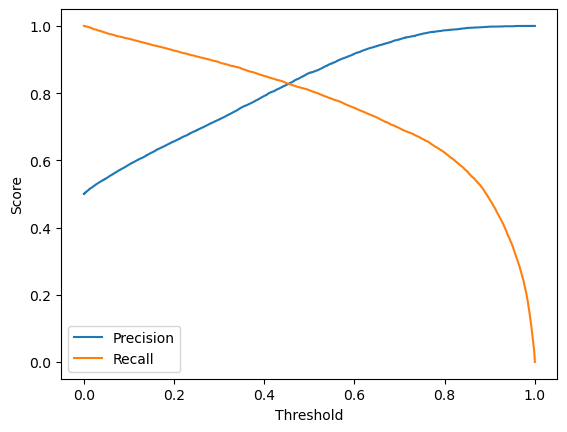

In [879]:
precision, recall, thresholds = precision_recall_curve(y_test, logit.predict_proba(X_test)[:, 1])
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


#### Random Forest Classification and Gradient Boosting Classifier

In [880]:
rf = RandomForestClassifier().fit(X_train, y_train)
importance = rf.feature_importances_
sorted(zip(importance, X_train.columns), reverse=True)[:10]

[(0.08576405042401923, 'num_medications|numchange'),
 (0.06648963477597061, 'num_procedures'),
 (0.06621331325580396, 'change|num_medications'),
 (0.05789823671621686, 'discharge_disposition_id_1'),
 (0.04980996744384949, 'insulin'),
 (0.04742601179522725, 'num_medications|num_lab_procedures'),
 (0.04405730460019488, 'time_in_hospital|num_lab_procedures'),
 (0.04136370149565103, 'metformin'),
 (0.03775402499546094, 'num_medications|num_procedures'),
 (0.037563555572555245, 'num_medications')]

In [881]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [882]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")
    print(f"{name}: {precision_score(y_test, preds):.4f}")
    print(f"{name}: {recall_score(y_test, preds):.4f}")


Random Forest: 0.9332
Random Forest: 0.9860
Random Forest: 0.8790
Gradient Boosting: 0.8940
Gradient Boosting: 0.9529
Gradient Boosting: 0.8291
